Importing Necessary modules

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Defining the universe of discourse for each variable

In [11]:
symptom_severity = np.arange(0, 11, 1)  # Symptom severity from 0 to 10
test_results = np.arange(0, 101, 1)     # Test results from 0 to 100
age = np.arange(0, 101, 1)              # Age from 0 to 100
weight = np.arange(0, 201, 1)           # Weight from 0 to 200 kg
blood_pressure = np.arange(0, 201, 1)   # Blood pressure from 0 to 200 mmHg
medication_necessity = np.arange(0, 101, 1)  # Medication necessity from 0 to 100

Defining fuzzy membership functions for symptom severity

In [12]:
#for symptom severity
severity_lo = fuzz.trimf(symptom_severity, [0, 0, 5])
severity_md = fuzz.trimf(symptom_severity, [0, 5, 10])
severity_hi = fuzz.trimf(symptom_severity, [5, 10, 10])

In [13]:
#for test results
test_lo = fuzz.trimf(test_results, [0, 0, 50])
test_md = fuzz.trimf(test_results, [0, 50, 100])
test_hi = fuzz.trimf(test_results, [50, 100, 100])


In [14]:
# for age
age_young = fuzz.trimf(age, [0, 0, 30])
age_middle = fuzz.trimf(age, [20, 40, 60])
age_old = fuzz.trimf(age, [50, 100, 100])

In [15]:
# for weight
weight_lo = fuzz.trimf(weight, [0, 0, 75])
weight_md = fuzz.trimf(weight, [50, 100, 150])
weight_hi = fuzz.trimf(weight, [100, 200, 200])

In [16]:
# for blood pressure
bp_low = fuzz.trimf(blood_pressure, [0, 0, 90])
bp_normal = fuzz.trimf(blood_pressure, [80, 120, 140])
bp_high = fuzz.trimf(blood_pressure, [130, 200, 200])

In [17]:
# for medication necessity
necessity_lo = fuzz.trimf(medication_necessity, [0, 0, 50])
necessity_md = fuzz.trimf(medication_necessity, [0, 50, 100])
necessity_hi = fuzz.trimf(medication_necessity, [50, 100, 100])

Now, let's define the universe of discourse for each variable:

In [18]:
symptom_severity_var = ctrl.Antecedent(symptom_severity, 'symptom_severity')
test_results_var = ctrl.Antecedent(test_results, 'test_results')
age_var = ctrl.Antecedent(age, 'age')
weight_var = ctrl.Antecedent(weight, 'weight')
blood_pressure_var = ctrl.Antecedent(blood_pressure, 'blood_pressure')
medication_necessity_var = ctrl.Consequent(medication_necessity, 'medication_necessity')

Assigning membership functions to fuzzy variables

In [19]:

symptom_severity_var['low'] = severity_lo
symptom_severity_var['medium'] = severity_md
symptom_severity_var['high'] = severity_hi

In [20]:
test_results_var['low'] = test_lo
test_results_var['medium'] = test_md
test_results_var['high'] = test_hi

In [21]:
age_var['young'] = age_young
age_var['middle'] = age_middle
age_var['old'] = age_old

In [22]:
weight_var['low'] = weight_lo
weight_var['medium'] = weight_md
weight_var['high'] = weight_hi

In [23]:
blood_pressure_var['low'] = bp_low
blood_pressure_var['normal'] = bp_normal
blood_pressure_var['high'] = bp_high

In [24]:
medication_necessity_var['low'] = necessity_lo
medication_necessity_var['medium'] = necessity_md
medication_necessity_var['high'] = necessity_hi


Now defining the fuzzy rules for decision

In [25]:

rule1 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['low'], medication_necessity_var['low'])
rule2 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['medium'], medication_necessity_var['medium'])
rule3 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['high'], medication_necessity_var['medium'])
rule4 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['low'], medication_necessity_var['medium'])
rule5 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['medium'], medication_necessity_var['high'])
rule6 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['high'], medication_necessity_var['high'])
rule7 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['low'], medication_necessity_var['high'])
rule8 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['medium'], medication_necessity_var['high'])
rule9 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['high'], medication_necessity_var['high'])
rule10 = ctrl.Rule(age_var['young'] & weight_var['low'] & blood_pressure_var['low'], medication_necessity_var['low'])
rule11 = ctrl.Rule(age_var['middle'] & weight_var['medium'] & blood_pressure_var['normal'], medication_necessity_var['medium'])
rule12 = ctrl.Rule(age_var['old'] & weight_var['high'] & blood_pressure_var['high'], medication_necessity_var['high'])


In [26]:
# Create control system
medication_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
medication_sim = ctrl.ControlSystemSimulation(medication_ctrl)

### **Testing the fuzzy logic with example inputs:**

In [27]:
medication_sim.input['symptom_severity'] = 6
medication_sim.input['test_results'] = 65
medication_sim.input['age'] = 45
medication_sim.input['weight'] = 70
medication_sim.input['blood_pressure'] = 130

In [28]:
# Compute the result
medication_sim.compute()

In [29]:
# Print and plot the result
print(f"Medication Necessity: {medication_sim.output['medication_necessity']}%")

Medication Necessity: 60.10721247563348%


Plotting the necessary results

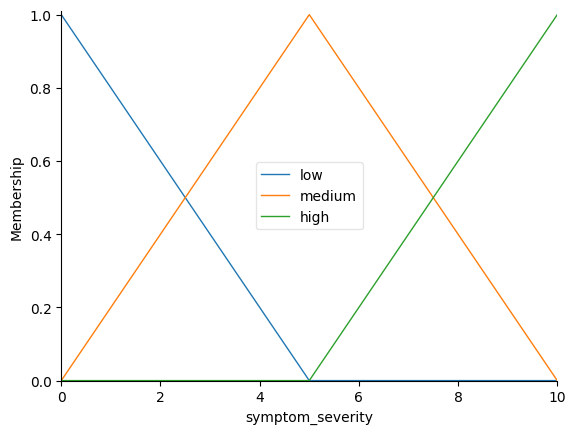

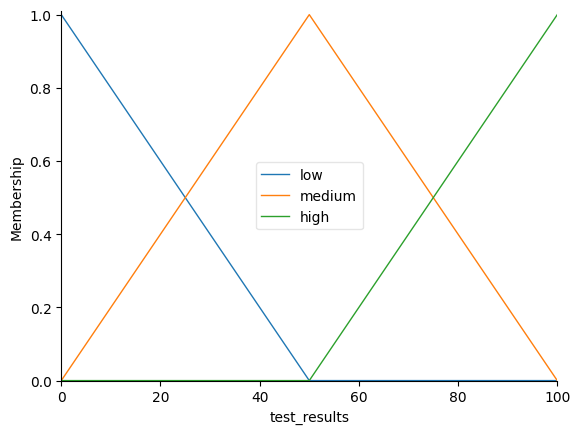

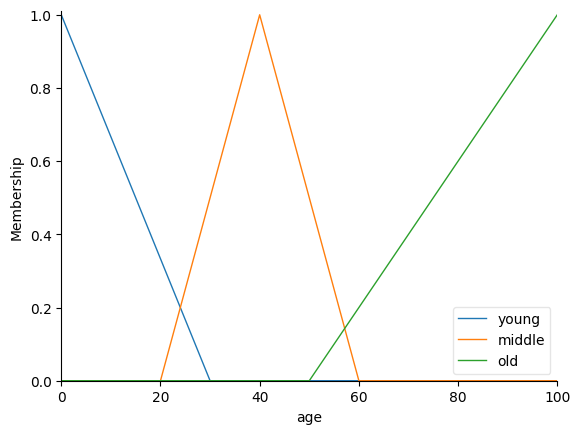

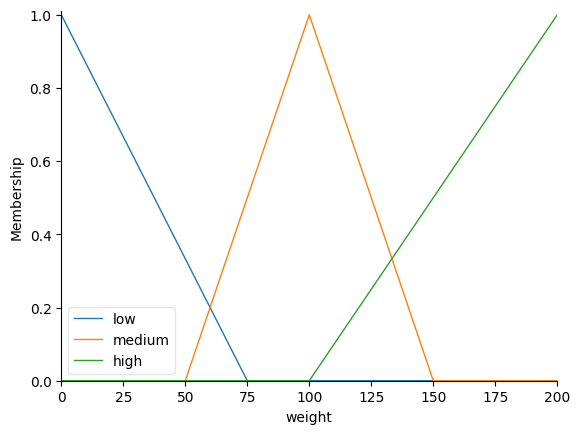

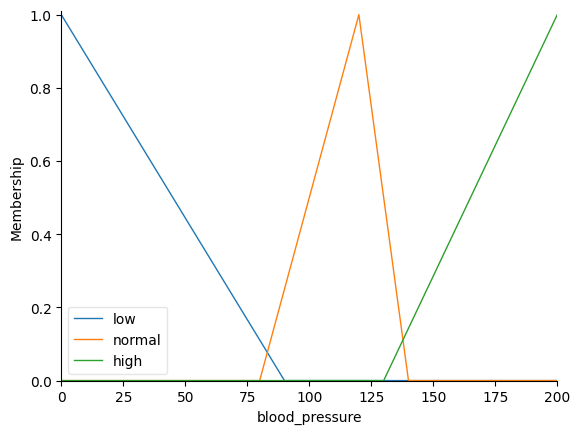

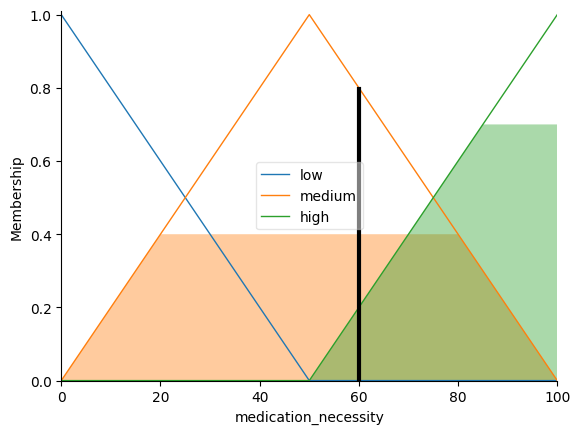

In [32]:
symptom_severity_var.view()
test_results_var.view()
age_var.view()
weight_var.view()
blood_pressure_var.view()
medication_necessity_var.view(sim=medication_sim)